In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options

## Read multiple URLs

In [12]:
urls = ['https://www.pccomponentes.com/auriculares',
        'https://www.pccomponentes.com/teclados',
        'https://www.pccomponentes.com/ratones',
        'https://www.pccomponentes.com/sillas-gaming',
        'https://www.pccomponentes.com/monitores-pc',
        'https://www.pccomponentes.com/smartphone-moviles'
        ]
#urls = ['https://www.pccomponentes.com/auriculares']
for url in urls:
        category = url.split('.com/')[-1]
        chrome = webdriver.Chrome()
        chrome.get(url)
        print("READING", url)
        try:
                element = WebDriverWait(chrome, 10).until(
                        EC.presence_of_element_located((By.ID, "cookiesAcceptAll"))
                )
                chrome.find_element(By.ID, 'cookiesAcceptAll').click()
        except:
                print("No hay cookies", url)
                pass
        
        grid = chrome.find_element(By.ID, 'product-grid')
        products = grid.find_elements(By.TAG_NAME, 'div')
        links = grid.find_elements(By.TAG_NAME, 'a')
        products_founded = 0
        print(f"LINKS FOUNDED: {len(links)}")
        for link in links:
                if link.get_attribute('data-product-id'):
                        product = link.find_element(By.CLASS_NAME, 'product-card')
                        name = ''
                        price = ''
                        reviews = ''
                        marketplace = False
                        if 'is-marketplace' in product.get_attribute('class'):
                                marketplace = True
                        try:
                                name = product.find_element(By.TAG_NAME, 'h3').text
                        except:
                                print(f"Name not found:")
                                pass
                        try:
                                price = product.find_element(By.CLASS_NAME, 'product-card__price-container').text.split('€')[0].replace(',','.')
                        except:
                                print("Price not found")
                                pass
                        try:
                                rating = product.find_element(By.CLASS_NAME, 'product-card__rating-container')
                                reviews = rating.find_element(By.TAG_NAME, 'span').text.replace('(','').replace(')','')
                        except:
                                print("Reviews not found")
                                pass
                        
                        if name!='' and price!='' and reviews!='':
                                products_founded += 1
                                with open('products.csv', 'a', newline='') as file:
                                        file.write(f'{url};{category};{name};{price};{reviews};{marketplace}\n')
                        else:
                                print(f"Product error: ", link.get_attribute('href'))
                else:
                        print(f"Not product link: {link.get_attribute('href')}")   
        print(f"PRODUCTS FOUNDED: {products_founded}")
        chrome.quit()



READING https://www.pccomponentes.com/auriculares
LINKS FOUNDED: 40
Reviews not found
Product error:  https://www.pccomponentes.com/poly-blackwire-c5220-auriculares-usb-jack-35mm
Reviews not found
Product error:  https://www.pccomponentes.com/corsair-virtuoso-pro-auriculares-gaming-blancos
PRODUCTS FOUNDED: 38
READING https://www.pccomponentes.com/teclados
LINKS FOUNDED: 40
Reviews not found
Product error:  https://www.pccomponentes.com/keychron-q1-pro-qmk-via-teclado-mecanico-inalambrico-fully-assembled-knob-carbon-black-switch-red
Reviews not found
Product error:  https://www.pccomponentes.com/keychron-k8-pro-qmk-via-teclado-mecanico-inalambrico-fully-assembled-hot-swappable-rgb-gateron-g-pro-red
PRODUCTS FOUNDED: 38
READING https://www.pccomponentes.com/ratones
LINKS FOUNDED: 43
PRODUCTS FOUNDED: 43
READING https://www.pccomponentes.com/sillas-gaming
LINKS FOUNDED: 44
Reviews not found
Product error:  https://www.pccomponentes.com/nacon-pro-silla-gaming-gris
Reviews not found
Produc

## Analyze

### Questions?
- What is the relationship between reviews and price?
- Which are the best products to improve?

In [ ]:
import pandas as pd

In [28]:
column_names = ['url', 'category', 'name', 'price', 'reviews', 'marketplace'] 
df = pd.read_csv('products.csv', sep=';',encoding='ISO-8859-1', names=column_names)
products = df.dropna(subset=['reviews'])

globalPrices = [
    products['price'].mean(),
    products['price'].max(),
    products['price'].min(),
    products['price'].quantile(0.25),
    products['price'].quantile(0.75)
]

print(f"Products: {products['url'].count()}")
print(f"Mean: {globalPrices[0]}")
print(f"Max: {globalPrices[1]}")
print(f"Min: {globalPrices[2]}")
print(f"25%: {globalPrices[3]}")
print(f"75%: {globalPrices[4]}")

Products: 240
Mean: 150.41622916666665
Max: 899.0
Min: 1.159
25%: 46.025
75%: 198.4675


### Tops and Worsts

In [77]:
quartileGlobal = round(len(products)/4)

orderedByReviews = products.sort_values(by='reviews', ascending=False)
tops = orderedByReviews.head(quartileGlobal)

topsPrice = [
    tops['price'].mean(),
    tops['price'].max(),
    tops['price'].min(),
    tops['price'].quantile(0.25),
    tops['price'].quantile(0.75)
]

orderedByReviews = products.sort_values(by='reviews', ascending=True)
worst = orderedByReviews.head(quartileGlobal)
worstPrice = [
    worst['price'].mean(),
    worst['price'].max(),
    worst['price'].min(),
    worst['price'].quantile(0.25),
    worst['price'].quantile(0.75)
]


print(f"Tops: {tops['name'].count()}")
print(f"Mean: {topsPrice[0]}")
print(f"Max: {topsPrice[1]}")
print(f"Min: {topsPrice[2]}")
print(f"25%: {topsPrice[3]}")
print(f"75%: {topsPrice[4]}")

print(f"Worst: {worst['name'].count()}")
print(f"Mean: {worstPrice[0]}")
print(f"Max: {worstPrice[1]}")
print(f"Min: {worstPrice[2]}")
print(f"25%: {worstPrice[3]}")
print(f"75%: {worstPrice[4]}")

Tops: 60
Mean: 108.17333333333333
Max: 799.0
Min: 5.29
25%: 29.4975
75%: 157.5
Worst: 60
Mean: 180.37283333333335
Max: 718.58
Min: 4.89
25%: 81.74
75%: 221.7375


### Find product opportunities

Conditions:
- Less than 10 reviews
- Price under average

In [112]:
minimumReviews = 30

In [114]:
opportunities = worst[worst['price'] < products['price'].mean()]
opportunitiesPrice = [
    opportunities['price'].mean(),
    opportunities['price'].max(),
    opportunities['price'].min(),
    opportunities['price'].quantile(0.25),
    opportunities['price'].quantile(0.75)
]

lessThan10 = opportunities[opportunities['reviews'] < minimumReviews]

print(f"Opportunities: {opportunities['name'].count()} / {worst['name'].count()}")
print(f"Less than {minimumReviews} reviews: {lessThan10['name'].count()} / {opportunities['name'].count()}")
print(f"Mean: {opportunitiesPrice[0]}")

print(f"Mean reviews: {opportunities['reviews'].mean()}")

print()
display(lessThan10)



Opportunities: 28 / 60
Less than 30 reviews: 26 / 28
Mean: 79.89285714285714
Mean reviews: 16.428571428571427



,url,category,name,price,reviews,marketplace
75,https://www.pccomponentes.com/teclados,teclados,Mountain MacroPad Controlador para Contenido e...,94.99,1,False
54,https://www.pccomponentes.com/teclados,teclados,Forgeon Clutch Teclado Gaming Wireless RGB 60%...,59.99,3,False
51,https://www.pccomponentes.com/teclados,teclados,Forgeon Clutch Teclado Gaming Wireless RGB 60%...,59.99,3,False
43,https://www.pccomponentes.com/teclados,teclados,Forgeon Clutch Teclado Gaming Wireless RGB 60%...,59.99,3,False
26,https://www.pccomponentes.com/auriculares,auriculares,Edifier G5BT CAT Auriculares Gaming Inalámbric...,149.99,5,False
113,https://www.pccomponentes.com/ratones,ratones,MSI M92 Ratón Gaming Óptico RGB 4000 DPI,46.37,6,False
37,https://www.pccomponentes.com/auriculares,auriculares,Plantronics CS540 Monoaural,134.24,6,True
195,https://www.pccomponentes.com/monitores-pc,monitores-pc,"ASUS VY229HE 21.5"" LED IPS FullHD 75Hz Negro",83.99,7,False
69,https://www.pccomponentes.com/teclados,teclados,Apple Magic Keyboard con Touch ID Plata,140.99,11,False
109,https://www.pccomponentes.com/ratones,ratones,Trust Wireless Mini Ratón Inalámbrico 1600 DPI...,4.89,11,False


### Charts

In [115]:
import matplotlib.pyplot as plt
import numpy as np

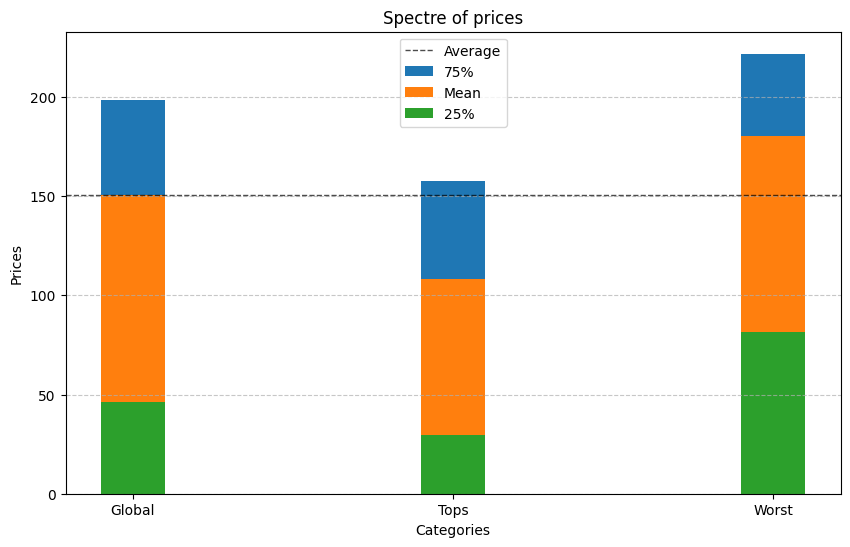

In [116]:
labels = ['Global', 'Tops', 'Worst']

quartile75 = [globalPrices[4], topsPrice[4], worstPrice[4]]
quartile25 = [globalPrices[3], topsPrice[3], worstPrice[3]]
mins = [globalPrices[2], topsPrice[2], worstPrice[2]]
maxs = [globalPrices[1], topsPrice[1], worstPrice[1]]
avg = [globalPrices[0], topsPrice[0], worstPrice[0]]
num_stats = len(labels)

bar_width = 0.2

x = np.arange(num_stats)

plt.figure(figsize=(10, 6))

plt.bar(x, quartile75, bar_width, label='75%')
plt.bar(x, avg, bar_width, label='Mean')
plt.bar(x, quartile25, bar_width, label='25%')

plt.axhline(y=globalPrices[0], color='black', linewidth=1 , linestyle='--', label='Average', alpha=0.7)

plt.title('Spectre of prices')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


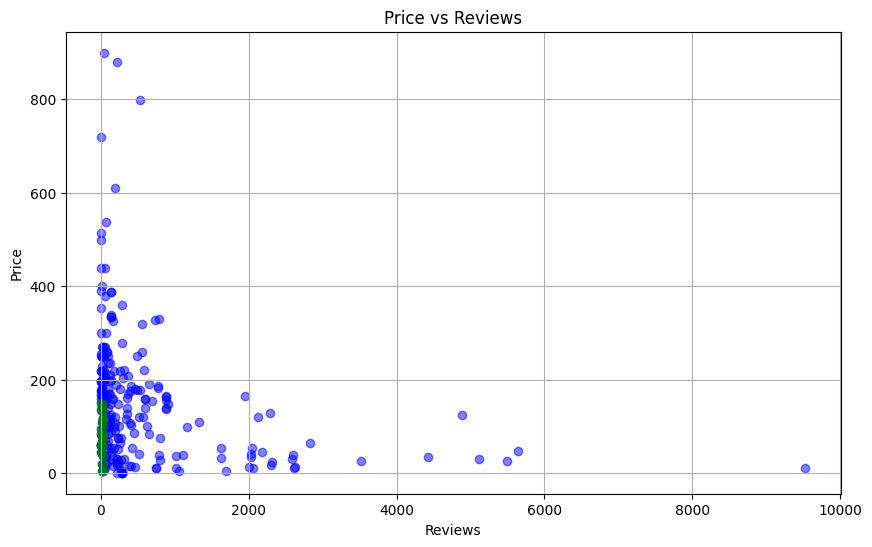

In [117]:
price = products['price']
reviews = products['reviews']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(reviews, price, color='blue', alpha=0.5)
plt.scatter(opportunities['reviews'], opportunities['price'], color='green', alpha=0.5)
plt.title('Price vs Reviews')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Hypothesis

- 5% of views converts in a purchase
- 10% of customers give a review

In [118]:
vps = 7 #12€ per month
vps_per_hour = 7/(30*24)
reviews_per_hour = 600 # 1 minute for scraping and generate 10 reviews
openai_per_review = 0.005 # is an aproach
review_price = (vps_per_hour / reviews_per_hour) + openai_per_review
print(f"Review price: {review_price}")

Review price: 0.005016203703703704


In [119]:
hypothetical = lessThan10.copy()
hypothetical['customers'] = hypothetical['reviews'] * 10
hypothetical['revenue'] = hypothetical['price'] * hypothetical['customers']
hypothetical['visits'] = hypothetical['customers'] * 50
display(hypothetical)

,url,category,name,price,reviews,marketplace,customers,revenue,visits
75,https://www.pccomponentes.com/teclados,teclados,Mountain MacroPad Controlador para Contenido e...,94.99,1,False,10,949.9,500
54,https://www.pccomponentes.com/teclados,teclados,Forgeon Clutch Teclado Gaming Wireless RGB 60%...,59.99,3,False,30,1799.7,1500
51,https://www.pccomponentes.com/teclados,teclados,Forgeon Clutch Teclado Gaming Wireless RGB 60%...,59.99,3,False,30,1799.7,1500
43,https://www.pccomponentes.com/teclados,teclados,Forgeon Clutch Teclado Gaming Wireless RGB 60%...,59.99,3,False,30,1799.7,1500
26,https://www.pccomponentes.com/auriculares,auriculares,Edifier G5BT CAT Auriculares Gaming Inalámbric...,149.99,5,False,50,7499.5,2500
113,https://www.pccomponentes.com/ratones,ratones,MSI M92 Ratón Gaming Óptico RGB 4000 DPI,46.37,6,False,60,2782.2,3000
37,https://www.pccomponentes.com/auriculares,auriculares,Plantronics CS540 Monoaural,134.24,6,True,60,8054.4,3000
195,https://www.pccomponentes.com/monitores-pc,monitores-pc,"ASUS VY229HE 21.5"" LED IPS FullHD 75Hz Negro",83.99,7,False,70,5879.3,3500
69,https://www.pccomponentes.com/teclados,teclados,Apple Magic Keyboard con Touch ID Plata,140.99,11,False,110,15508.9,5500
109,https://www.pccomponentes.com/ratones,ratones,Trust Wireless Mini Ratón Inalámbrico 1600 DPI...,4.89,11,False,110,537.9,5500


__Scenario 1__
- With 20 reviews, a product increase 3% of visits

__Scenario 2__
- With 20 reviews, a product increase 5% of visits

In [120]:
scenario1 = hypothetical.copy()
scenario1['visits'] = scenario1['visits'] * 1.03
scenario1['customers'] = scenario1['visits'] / 50
scenario1['revenue'] = scenario1['price'] * scenario1['customers']

scenario2 = hypothetical.copy()
scenario2['visits'] = scenario2['visits'] * 1.05
scenario2['customers'] = scenario2['visits'] / 50
scenario2['revenue'] = scenario2['price'] * scenario2['customers']


print(f"Revenue Hypothetical: {hypothetical['revenue'].sum()}")
print(f"Customers Hypothetical: {hypothetical['customers'].sum()}")
print()
print(f"Revenue Scenario 1: {scenario1['revenue'].sum()}")
print(f"Customers Scenario 1: {scenario1['customers'].sum()}")
print(f"Revenue increase: {scenario1['revenue'].sum() - hypothetical['revenue'].sum()}")
print(f"Costs: {scenario1['customers'].sum() * review_price}")
print()
print(f"Revenue Scenario 2: {scenario2['revenue'].sum()}")
print(f"Customers Scenario 2: {scenario2['customers'].sum()}")
print(f"Revenue increase: {scenario2['revenue'].sum() - hypothetical['revenue'].sum()}")
print(f"Costs: {scenario2['customers'].sum() * review_price}")


Revenue Hypothetical: 325501.0
Customers Hypothetical: 3970

Revenue Scenario 1: 335266.02999999997
Customers Scenario 1: 4089.1
Revenue increase: 9765.02999999997
Costs: 20.511758564814816

Revenue Scenario 2: 341776.05000000005
Customers Scenario 2: 4168.5
Revenue increase: 16275.050000000047
Costs: 20.91004513888889
